In [1]:
import csv
import pandas as pd
import re
import string
import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
df_bm_wo_crit_new = pd.read_csv("/Users/datascienceuser/code/reneSalmon/fairjobs/raw_data/basemodel_310821_afterlunch.csv", index_col=0)
df_bm_wo_crit_new.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,"['border', 'patrol', 'agents', 'prevent', 'ter...",11,10,52.0,48.0,neutral
1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,"['gap', 'brands', 'bridge', 'gaps', 'see', 'wo...",16,13,55.0,45.0,masculine
2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,"['county', 'san', 'diego', 'invites', 'resumes...",5,3,62.0,37.0,masculine


In [3]:
df_bm_wo_crit_new.shape

(3120, 13)

In [4]:
df = df_bm_wo_crit_new.drop(columns=['clean_description'])
df.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender
0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,10,52.0,48.0,neutral
1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,13,55.0,45.0,masculine
2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,3,62.0,37.0,masculine


In [5]:
df.shape

(3120, 12)

In [6]:
df_wo_gen = pd.read_csv("/Users/datascienceuser/code/reneSalmon/fairjobs/raw_data/df_gen_crit__review_310821-17.csv", index_col=0)
df_wo_gen.head(3)

,Unnamed: 0.1,job_id,url,loc,company_name,job_title,job_description,company_url,clean_description,company culture,inclusion,flexibility,personal development,indeed_review_score
0,0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,border patrol agents prevent terrorists terror...,20,20,20,20,3.9
1,1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,gap brands bridge gaps see world old navy demo...,60,60,20,40,3.7
2,2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,county san diego invites resumes position regi...,0,40,0,0,4.1


In [7]:
df_wo_gen.shape

(3120, 14)

In [14]:
df['indeed_review_score'] = df_wo_gen['indeed_review_score']
df.head()

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score
0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,10,52.0,48.0,neutral,3.9
1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,13,55.0,45.0,masculine,3.7
2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,3,62.0,37.0,masculine,4.1
3,job_38eab52a8b828c7f,https://www.indeed.com/rc/clk?jk=38eab52a8b828...,"Malibu, CA","City of Malibu, CA",Code Enforcement Officer,Application Deadline\nApplication Deadline Ext...,"https://www.indeed.com/cmp/City of Malibu, CA",0,0,0.0,0.0,masculine,-
4,job_6dc51c91cb582a3e,https://www.indeed.com/company/SafeStreetsUSA/...,"Sacramento, CA 95811 (Midtown - Winn Park Capi...",SafeStreetsUSA,newAPPRENTICE NEEDED ASAP,SafeStreets is the largest provider of ADT sec...,https://www.indeed.com/cmp/SafeStreetsUSA,0,1,0.0,100.0,feminine,3.6


In [15]:
df.shape

(3120, 13)

In [16]:
# Gregs cleaning function that should be imported elsewhere
def clean (text):
    text_urless=re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', text)
    for punctuation in string.punctuation:
        text = text_urless.replace(punctuation, ' ') # Remove Punctuation
        lowercased = text.lower() # Lower Case
        unaccented_string = unidecode.unidecode(lowercased) # remove accents
        tokenized = word_tokenize(unaccented_string) # Tokenize
        words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
        stop_words = set(stopwords.words('english')) # Make stopword list
        without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    return " ".join(without_stopwords)

In [17]:
df["clean_description"]=df["job_description"].apply(clean)

In [21]:
df_all = df
df_all.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description
0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,10,52.0,48.0,neutral,3.9,border patrol agents prevent terrorists terror...
1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,13,55.0,45.0,masculine,3.7,gap brands bridge gaps see world old navy demo...
2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,3,62.0,37.0,masculine,4.1,county san diego invites resumes position regi...


In [22]:
# Anita's customized criterias dictionary:
anita_dict={"company culture":["support", "collaborat", "team", "value", "cultur"],
            "inclusion": ["transparen", "fair", "open", "inclusi", "equal"],
            "flexibility" :["home", "part time", "flexib", "balance", "vacation"],
            "personal development": ["develop", "grow", "learn", "train", "coach"]}

In [23]:
# check if keywords are in description and return a percentage based on it
def criteria_percentage_count(description, dict_list):
    count_percentage=0
    for x in dict_list:
        help_list=[u for u in description.split() if x in u]
        if len(help_list) >= 1:
            count_percentage += 1   
    if count_percentage == 5:
        return 100
    if count_percentage == 4:
        return 80
    if count_percentage == 3:
        return 60
    if count_percentage == 2:
        return 40
    if count_percentage == 1:
        return 20
    return 0

In [24]:
def building_features_anita(df):
    for x in anita_dict.keys():
        dict_list=anita_dict[x]        
        df[f"{x}"]=df["clean_description"].apply(criteria_percentage_count, args=([dict_list]))  

In [25]:
building_features_anita(df_all)

In [26]:
# compute relevance score by using slider value and main criteria percentage
def comp_relevance_score(df, var1, var2, var3, var4):
    df["relevance score"]= round((var1*df["company culture"] + \
                                    var2*df["inclusion"] + \
                                    var3*df["flexibility"] + \
                                    var4*df["personal development"]) \
                                    / (var1+var2+var3+var4),0)

In [27]:
comp_relevance_score(df_all, 1, 1, 1, 1)
df_all.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
0,job_baf1c790909ea0b1,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"San Diego, CA+2 locations",U.S. Customs and Border Protection,Border Patrol Agent,Border Patrol Agents prevent terrorists and te...,https://www.indeed.com/cmp/U.S. Customs and Bo...,11,10,52.0,48.0,neutral,3.9,border patrol agents prevent terrorists terror...,20,20,20,20,20.0
1,job_60daea4ff25e738f,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"Rocklin, CA 95765+4 locations•Remote",Gap Inc.,newCustomer Service Representative,About Gap Inc.\nOur brands bridge the gaps we ...,https://www.indeed.com/cmp/Gap Inc.,16,13,55.0,45.0,masculine,3.7,gap brands bridge gaps see world old navy demo...,60,60,20,40,45.0
2,job_85f1c40a9e2489be,https://www.indeed.com/rc/clk?jk=85f1c40a9e248...,"San Diego, CA (Core-Columbia area)",County of San Diego,Registrar of Voters,The County of San Diego invites resumes for th...,https://www.indeed.com/cmp/County of San Diego,5,3,62.0,37.0,masculine,4.1,county san diego invites resumes position regi...,0,40,0,0,10.0


No handles with labels found to put in legend.


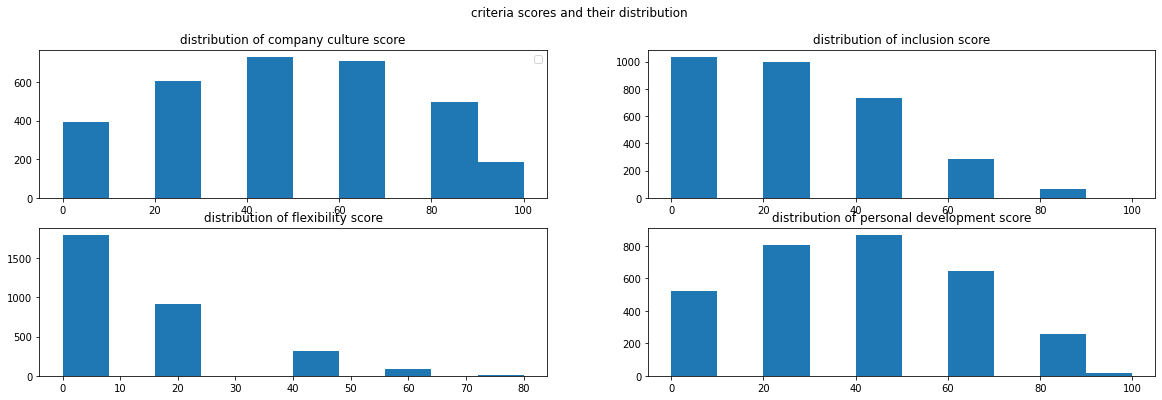

In [28]:
# Start a figure
plt.figure(figsize=(20,6))
# First subplot
plt.subplot(2,2,1)
plt.hist(df_all['company culture'])
plt.plot()
plt.title('distribution of company culture score')
plt.legend()
# Second subplot
plt.subplot(2,2,2) 
plt.hist(df_all['inclusion'])
plt.title("distribution of inclusion score")
# Third subplot
plt.subplot(2,2,3) 
plt.hist(df_all['flexibility'])
plt.title("distribution of flexibility score")
# Fourth subplot
plt.subplot(2,2,4) 
plt.hist(df_all['personal development'])
plt.title("distribution of personal development score")
# Global figure methods
plt.suptitle('criteria scores and their distribution')
plt.show()

In [29]:
df_high_relev = df_all.loc[df_all['relevance score'].apply(lambda x: x >= 75) == True]
df_high_relev

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
841,job_2e33b2d801772862,https://www.indeed.com/rc/clk?jk=2e33b2d801772...,"Minneapolis, MN",University of Minnesota,newData Engineer,Required Qualifications:\nBA/BS degree plus tw...,https://www.indeed.com/cmp/University of Minne...,44,29,60.0,40.0,masculine,4.2,required qualifications degree plus two years ...,100,60,60,80,75.0
1054,job_2fbfe88cd46970e9,https://www.indeed.com/rc/clk?jk=2fbfe88cd4697...,"Washington, DC 20001 (Chinatown area)",Monumental Sports & Entertainment,"newCoordinator, Booking","Monumental Sports & Entertainment (MSE), locat...",https://www.indeed.com/cmp/Monumental Sports &...,20,21,49.0,51.0,neutral,-,monumental sports entertainment mse located wa...,80,80,60,80,75.0
1872,job_94164d604e67d2e1,https://www.indeed.com/rc/clk?jk=94164d604e67d...,"Minneapolis, MN 55401 (North Loop area)",University of Minnesota,newData Engineer,"Twin Cities, Minnesota (MN)\nEmployer: Univers...",https://www.indeed.com/cmp/University of Minne...,44,29,60.0,40.0,masculine,4.2,twin cities minnesota mn employer university m...,100,60,60,80,75.0
2433,job_f0457a32795e50f5,https://www.indeed.com/rc/clk?jk=f0457a32795e5...,"San Francisco, CA","Amazon Web Services, Inc.",newSales Operations and Strategy Analyst,\nBachelor’s degree\n3+ years experience as an...,https://www.indeed.com/cmp/Amazon Web Services...,42,19,69.0,31.0,masculine,-,bachelor degree years experience analyst years...,100,80,60,60,75.0
3064,job_80e7bd4f5909d9bb,https://www.indeed.com/rc/clk?jk=80e7bd4f5909d...,"Seattle, WA","Amazon Web Services, Inc.","Digital Marketing Manager, Training and Certif...",\n2+ years of experience in a high-tech demand...,https://www.indeed.com/cmp/Amazon Web Services...,39,29,57.0,43.0,masculine,-,years experience demand marketing role bachelo...,100,60,60,80,75.0


In [30]:
df_high_comcul = df_all.loc[df_all['company culture'].apply(lambda x: x == 100) == True].sort_values(by=["relevance score"], ascending=False)
df_high_comcul.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
1872,job_94164d604e67d2e1,https://www.indeed.com/rc/clk?jk=94164d604e67d...,"Minneapolis, MN 55401 (North Loop area)",University of Minnesota,newData Engineer,"Twin Cities, Minnesota (MN)\nEmployer: Univers...",https://www.indeed.com/cmp/University of Minne...,44,29,60.0,40.0,masculine,4.2,twin cities minnesota mn employer university m...,100,60,60,80,75.0
2433,job_f0457a32795e50f5,https://www.indeed.com/rc/clk?jk=f0457a32795e5...,"San Francisco, CA","Amazon Web Services, Inc.",newSales Operations and Strategy Analyst,\nBachelor’s degree\n3+ years experience as an...,https://www.indeed.com/cmp/Amazon Web Services...,42,19,69.0,31.0,masculine,-,bachelor degree years experience analyst years...,100,80,60,60,75.0
841,job_2e33b2d801772862,https://www.indeed.com/rc/clk?jk=2e33b2d801772...,"Minneapolis, MN",University of Minnesota,newData Engineer,Required Qualifications:\nBA/BS degree plus tw...,https://www.indeed.com/cmp/University of Minne...,44,29,60.0,40.0,masculine,4.2,required qualifications degree plus two years ...,100,60,60,80,75.0


In [31]:
df_high_incl = df_all.loc[df_all['inclusion'].apply(lambda x: x >= 80) == True].sort_values(by=["relevance score"], ascending=False)
df_high_incl.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
2433,job_f0457a32795e50f5,https://www.indeed.com/rc/clk?jk=f0457a32795e5...,"San Francisco, CA","Amazon Web Services, Inc.",newSales Operations and Strategy Analyst,\nBachelor’s degree\n3+ years experience as an...,https://www.indeed.com/cmp/Amazon Web Services...,42,19,69.0,31.0,masculine,-,bachelor degree years experience analyst years...,100,80,60,60,75.0
1054,job_2fbfe88cd46970e9,https://www.indeed.com/rc/clk?jk=2fbfe88cd4697...,"Washington, DC 20001 (Chinatown area)",Monumental Sports & Entertainment,"newCoordinator, Booking","Monumental Sports & Entertainment (MSE), locat...",https://www.indeed.com/cmp/Monumental Sports &...,20,21,49.0,51.0,neutral,-,monumental sports entertainment mse located wa...,80,80,60,80,75.0
2744,job_6088a40eaf51bb22,https://www.indeed.com/rc/clk?jk=6088a40eaf51b...,"Seattle, WA+6 locations","Amazon Web Services, Inc.",Events Operations Analyst,"\n3+ years’ experience in a business analyst, ...",https://www.indeed.com/cmp/Amazon Web Services...,55,27,67.0,33.0,masculine,-,years experience business analyst data analyst...,80,80,60,60,70.0


In [32]:
df_high_flex = df_all.loc[df_all['flexibility'].apply(lambda x: x >= 80) == True].sort_values(by=["relevance score"], ascending=False)
df_high_flex.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
213,job_f7a086d756a6fb76,https://www.indeed.com/rc/clk?jk=f7a086d756a6f...,California•Remote,FieldLevel,Entry Level Data Analyst,About FieldLevel\n\nFieldLevel is the athletic...,https://www.indeed.com/cmp/FieldLevel,48,22,69.0,31.0,masculine,-,fieldlevel fieldlevel athletic recruiting netw...,80,40,80,80,70.0
2562,job_fa9cebecc87172d0,https://www.indeed.com/rc/clk?jk=fa9cebecc8717...,"Oakland, CA",Roofstock,Product Analyst,Roofstock is the leading marketplace for inves...,https://www.indeed.com/cmp/Roofstock,24,10,71.0,29.0,masculine,-,roofstock leading marketplace investing rental...,100,20,80,80,70.0
491,job_da7f9f6378daea83,https://www.indeed.com/rc/clk?jk=da7f9f6378dae...,"Yucca Valley, CA+1 location",STARS Behavioral Health Group,newData and Records Clerk - AM,Stars Behavioral Health Group was recently cer...,https://www.indeed.com/cmp/STARS Behavioral He...,11,17,39.0,61.0,feminine,3.2,stars behavioral health group recently certifi...,100,0,80,60,60.0


In [33]:
df_high_persdev = df_all.loc[df_all['personal development'].apply(lambda x: x == 100) == True].sort_values(by=["relevance score"], ascending=False)
df_high_persdev.head(3)

,job_id,url,loc,company_name,job_title,job_description,company_url,masc_words,fem_words,masc_coded,fem_coded,gender,indeed_review_score,clean_description,company culture,inclusion,flexibility,personal development,relevance score
2644,job_cf49bffff21a699a,https://www.indeed.com/rc/clk?jk=cf49bffff21a6...,"San Francisco, CA",Hillel International,Assistant Director,Assistant Director\nSan Francisco Hillel\nRole...,https://www.indeed.com/cmp/Hillel International,28,53,35.0,65.0,feminine,4.8,assistant director san francisco hillel role o...,100,60,20,100,70.0
1551,job_e5cd45fa06b227b4,https://www.indeed.com/rc/clk?jk=e5cd45fa06b22...,"Houston, TX",AIG,newCall Center Team Lead,"Who we are\n\nAmerican International Group, In...",https://www.indeed.com/cmp/AIG,18,9,67.0,33.0,masculine,3.7,american international group aig leading globa...,60,60,40,100,65.0
1522,job_c5f1d014db4a1eb8,https://www.indeed.com/rc/clk?jk=c5f1d014db4a1...,"Houston, TX 77033 (Ost - South Union area)",YES Prep Public Schools,newMANAGING DIRECTOR OF SCHOOL OPERATIONS,REPORTS TO: Chief Operating Officer\nPOSITION ...,https://www.indeed.com/cmp/YES Prep Public Sch...,30,29,51.0,49.0,neutral,3.4,reports chief operating officer position type ...,100,40,20,100,65.0


In [34]:
df_all.to_csv('/Users/datascienceuser/code/reneSalmon/fairjobs/raw_data/df_all_3108-20.csv')

In [35]:
compression_opts = dict(method='zip',
                        archive_name='df_all_3108-20.csv')  
df_all.to_csv('/Users/datascienceuser/code/reneSalmon/fairjobs/raw_data/df_all_3108-20.zip', index=False,
          compression=compression_opts)